In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/duncanwan/Desktop/learning/Bitcoin/4hrs/BTC_combined_2024_v2.csv')


In [19]:
print("Funding min/max:", df["funding_rate"].min(), df["funding_rate"].max())
# Expect around ±0.0001 (~±0.01%) at extremes; clip obvious spikes if needed:
df["funding_rate"] = df["funding_rate"].clip(-0.01, 0.01)  # very loose safety

Funding min/max: -0.00012232 0.00088148


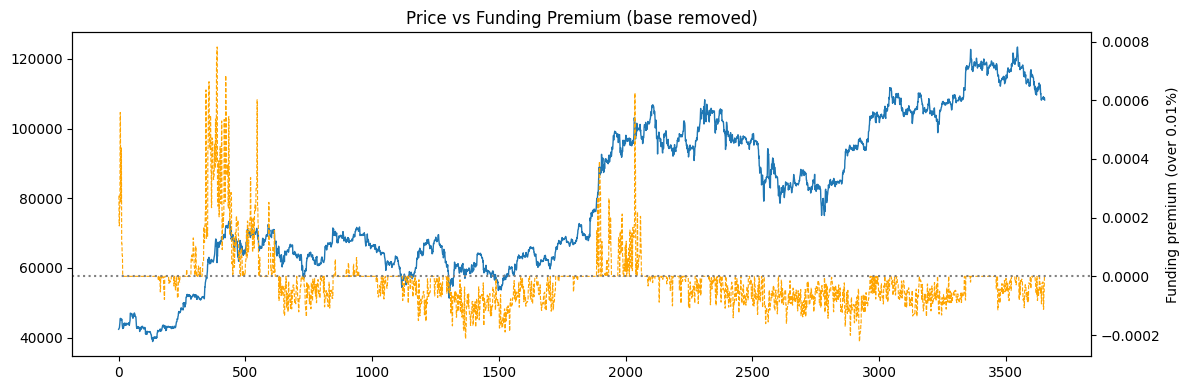

In [20]:
BASE = 0.0001  # 0.01% per 8h
df["fund_premium"] = df["funding_rate"] - BASE


PRICE="prep_close"
fig, ax1 = plt.subplots(figsize=(12,4))
ax1.plot(df.index, df[PRICE], lw=1)
ax2 = ax1.twinx()
ax2.plot(df.index, df["fund_premium"], lw=0.8, ls="--", color="orange", label="fund_premium")
ax2.axhline(0, color="gray", ls=":")
ax2.set_ylabel("Funding premium (over 0.01%)")
ax1.set_title("Price vs Funding Premium (base removed)"); plt.tight_layout(); plt.show()